# Explore here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

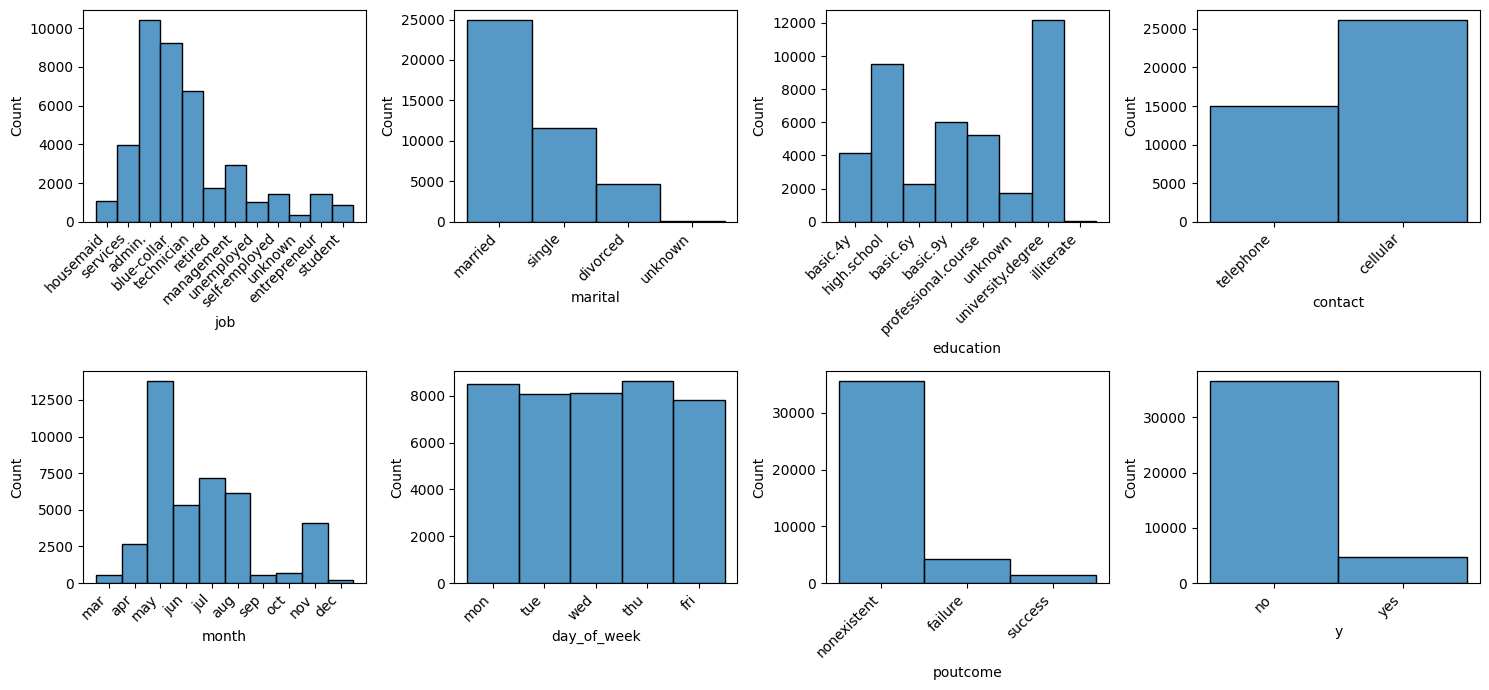

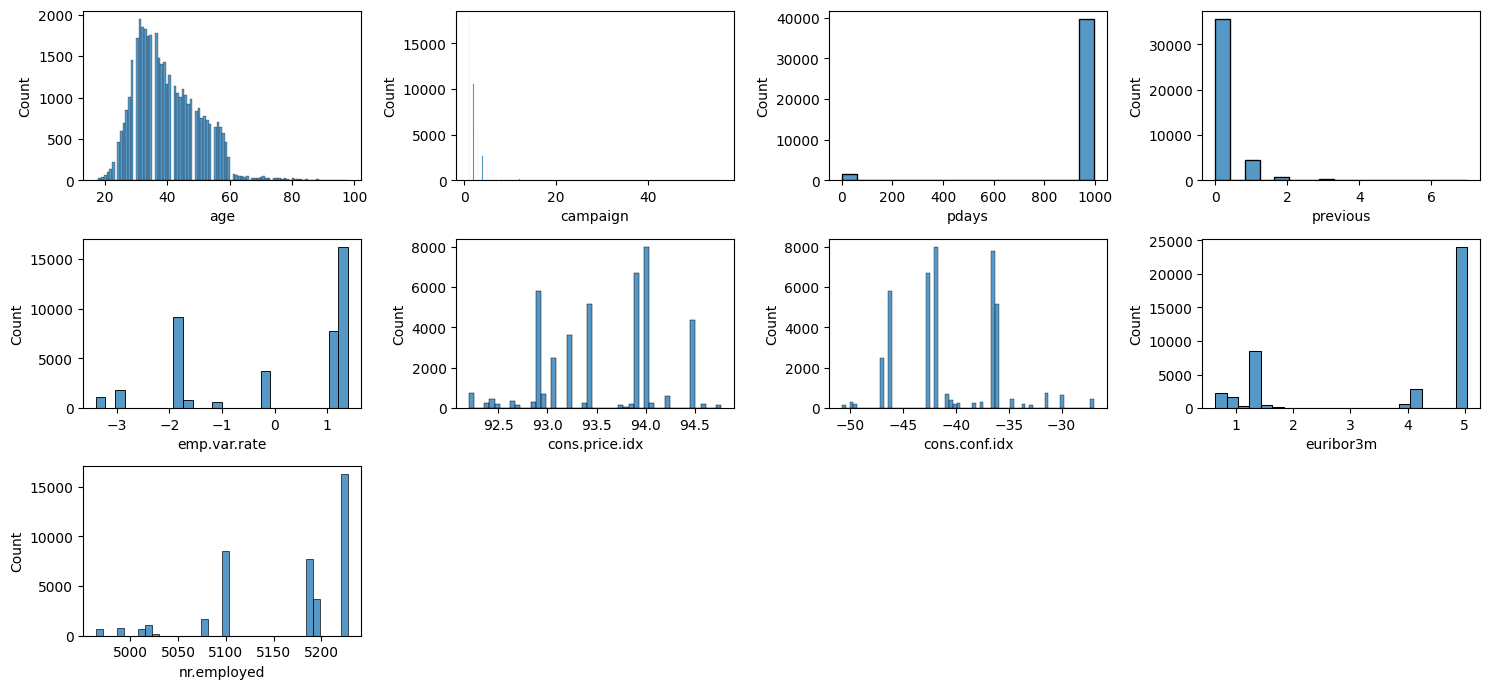

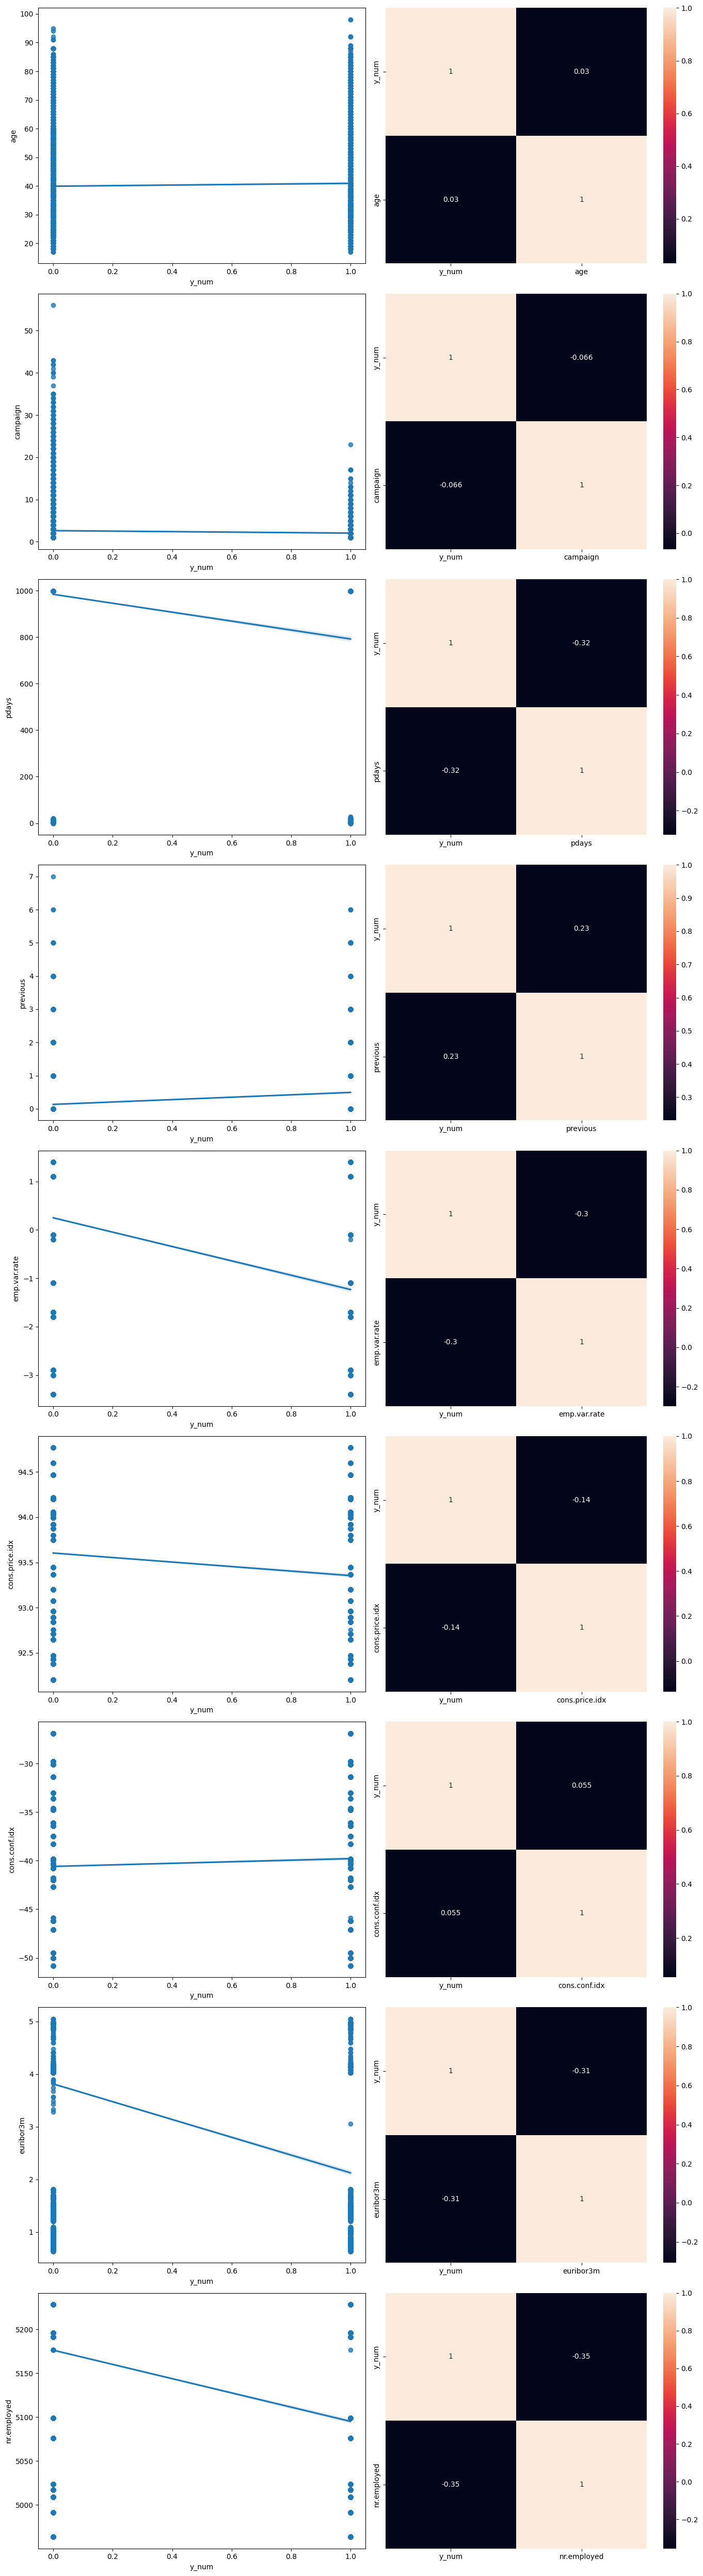

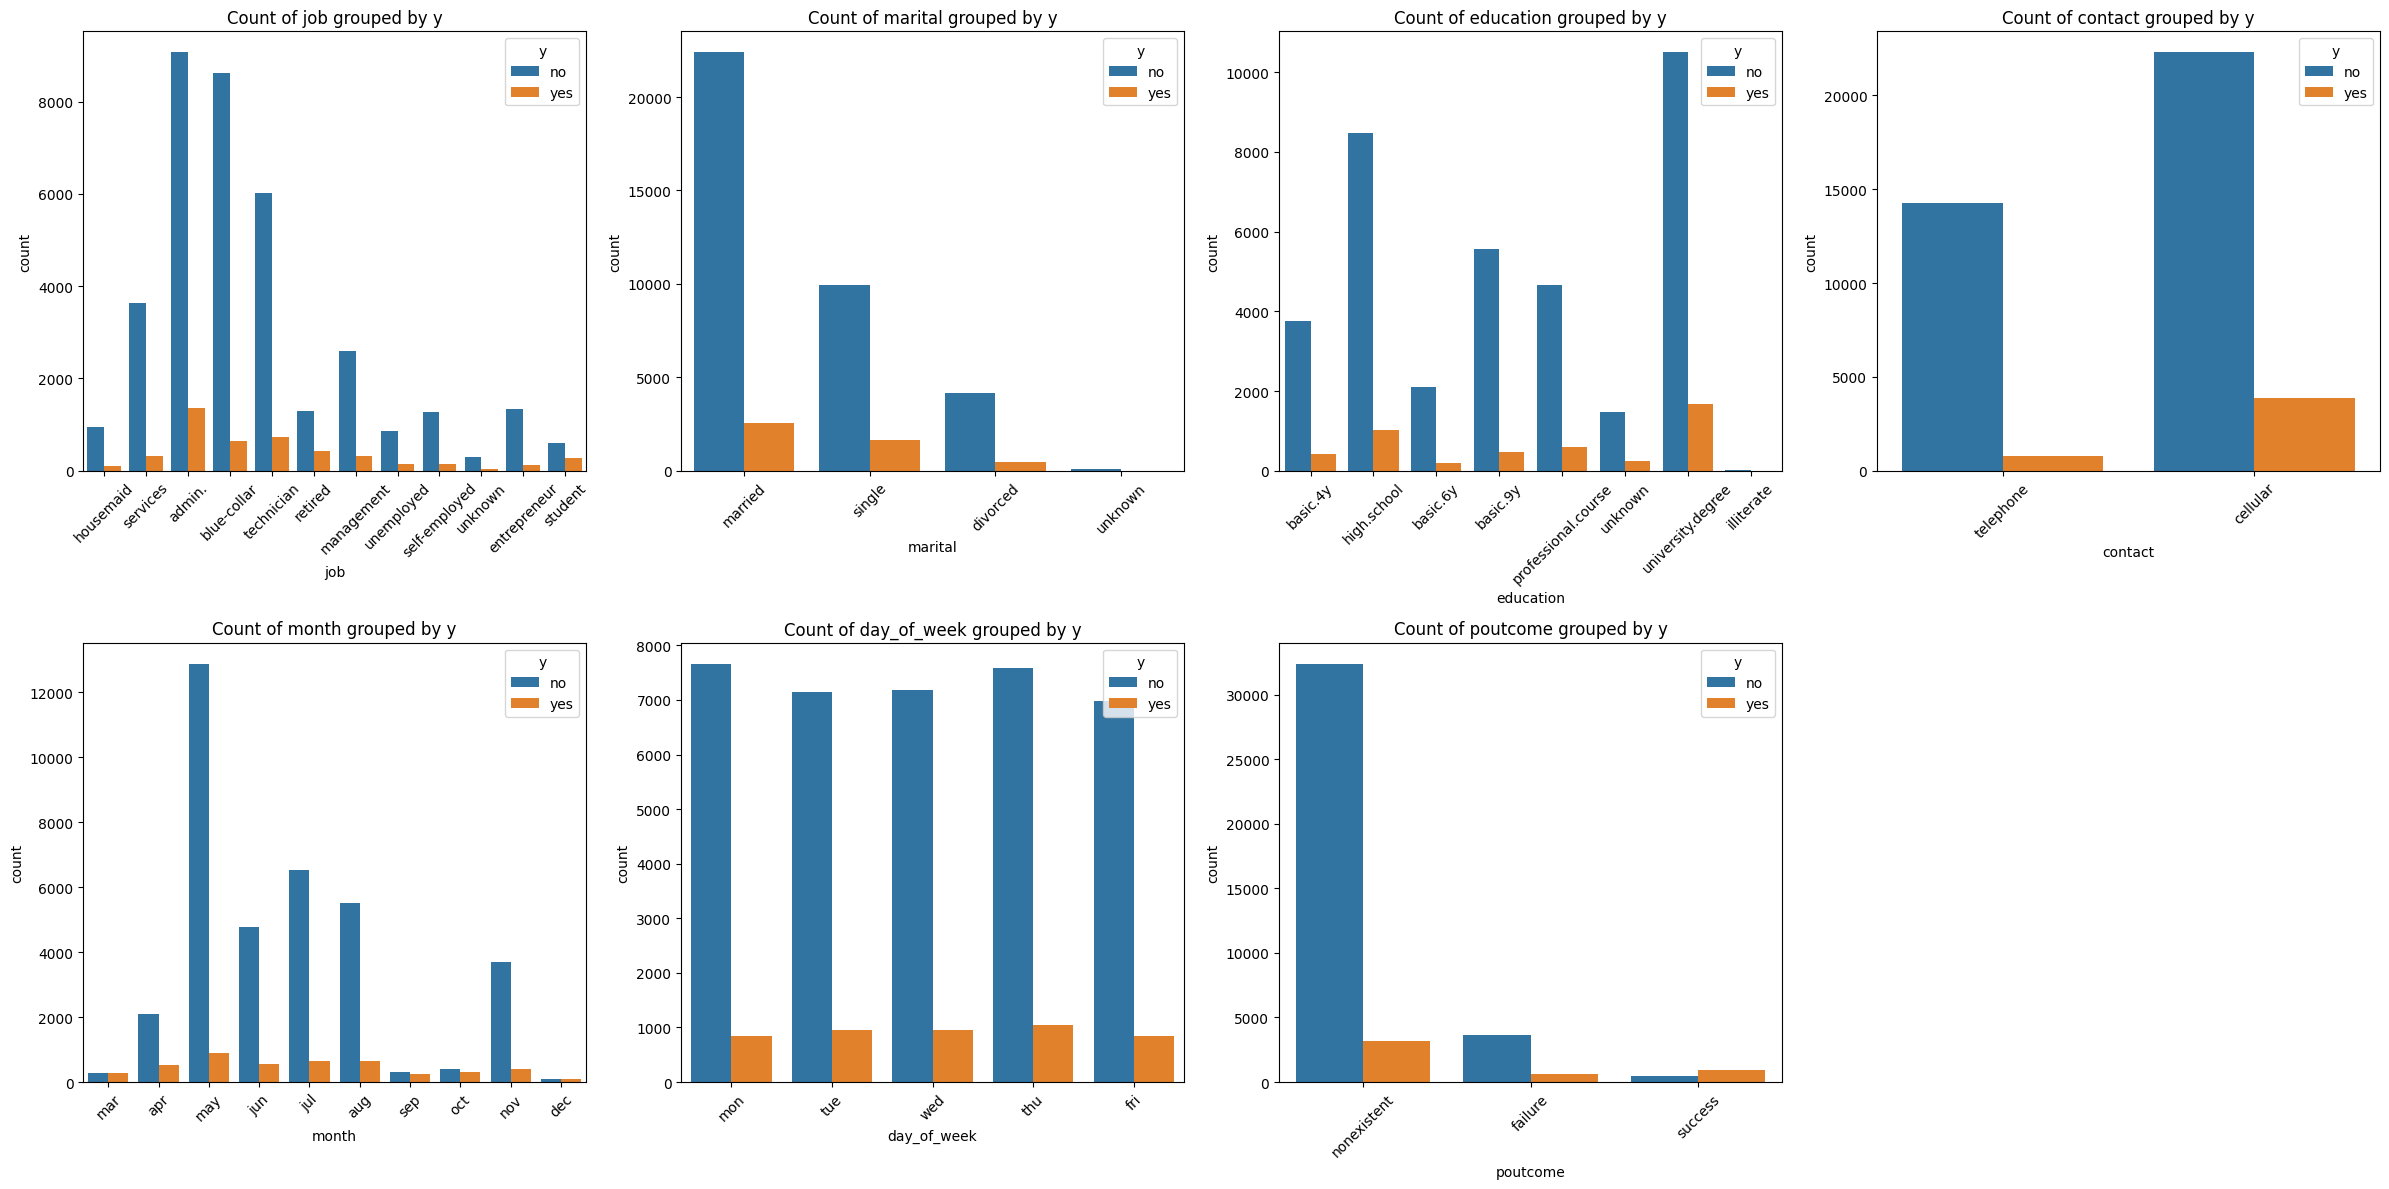

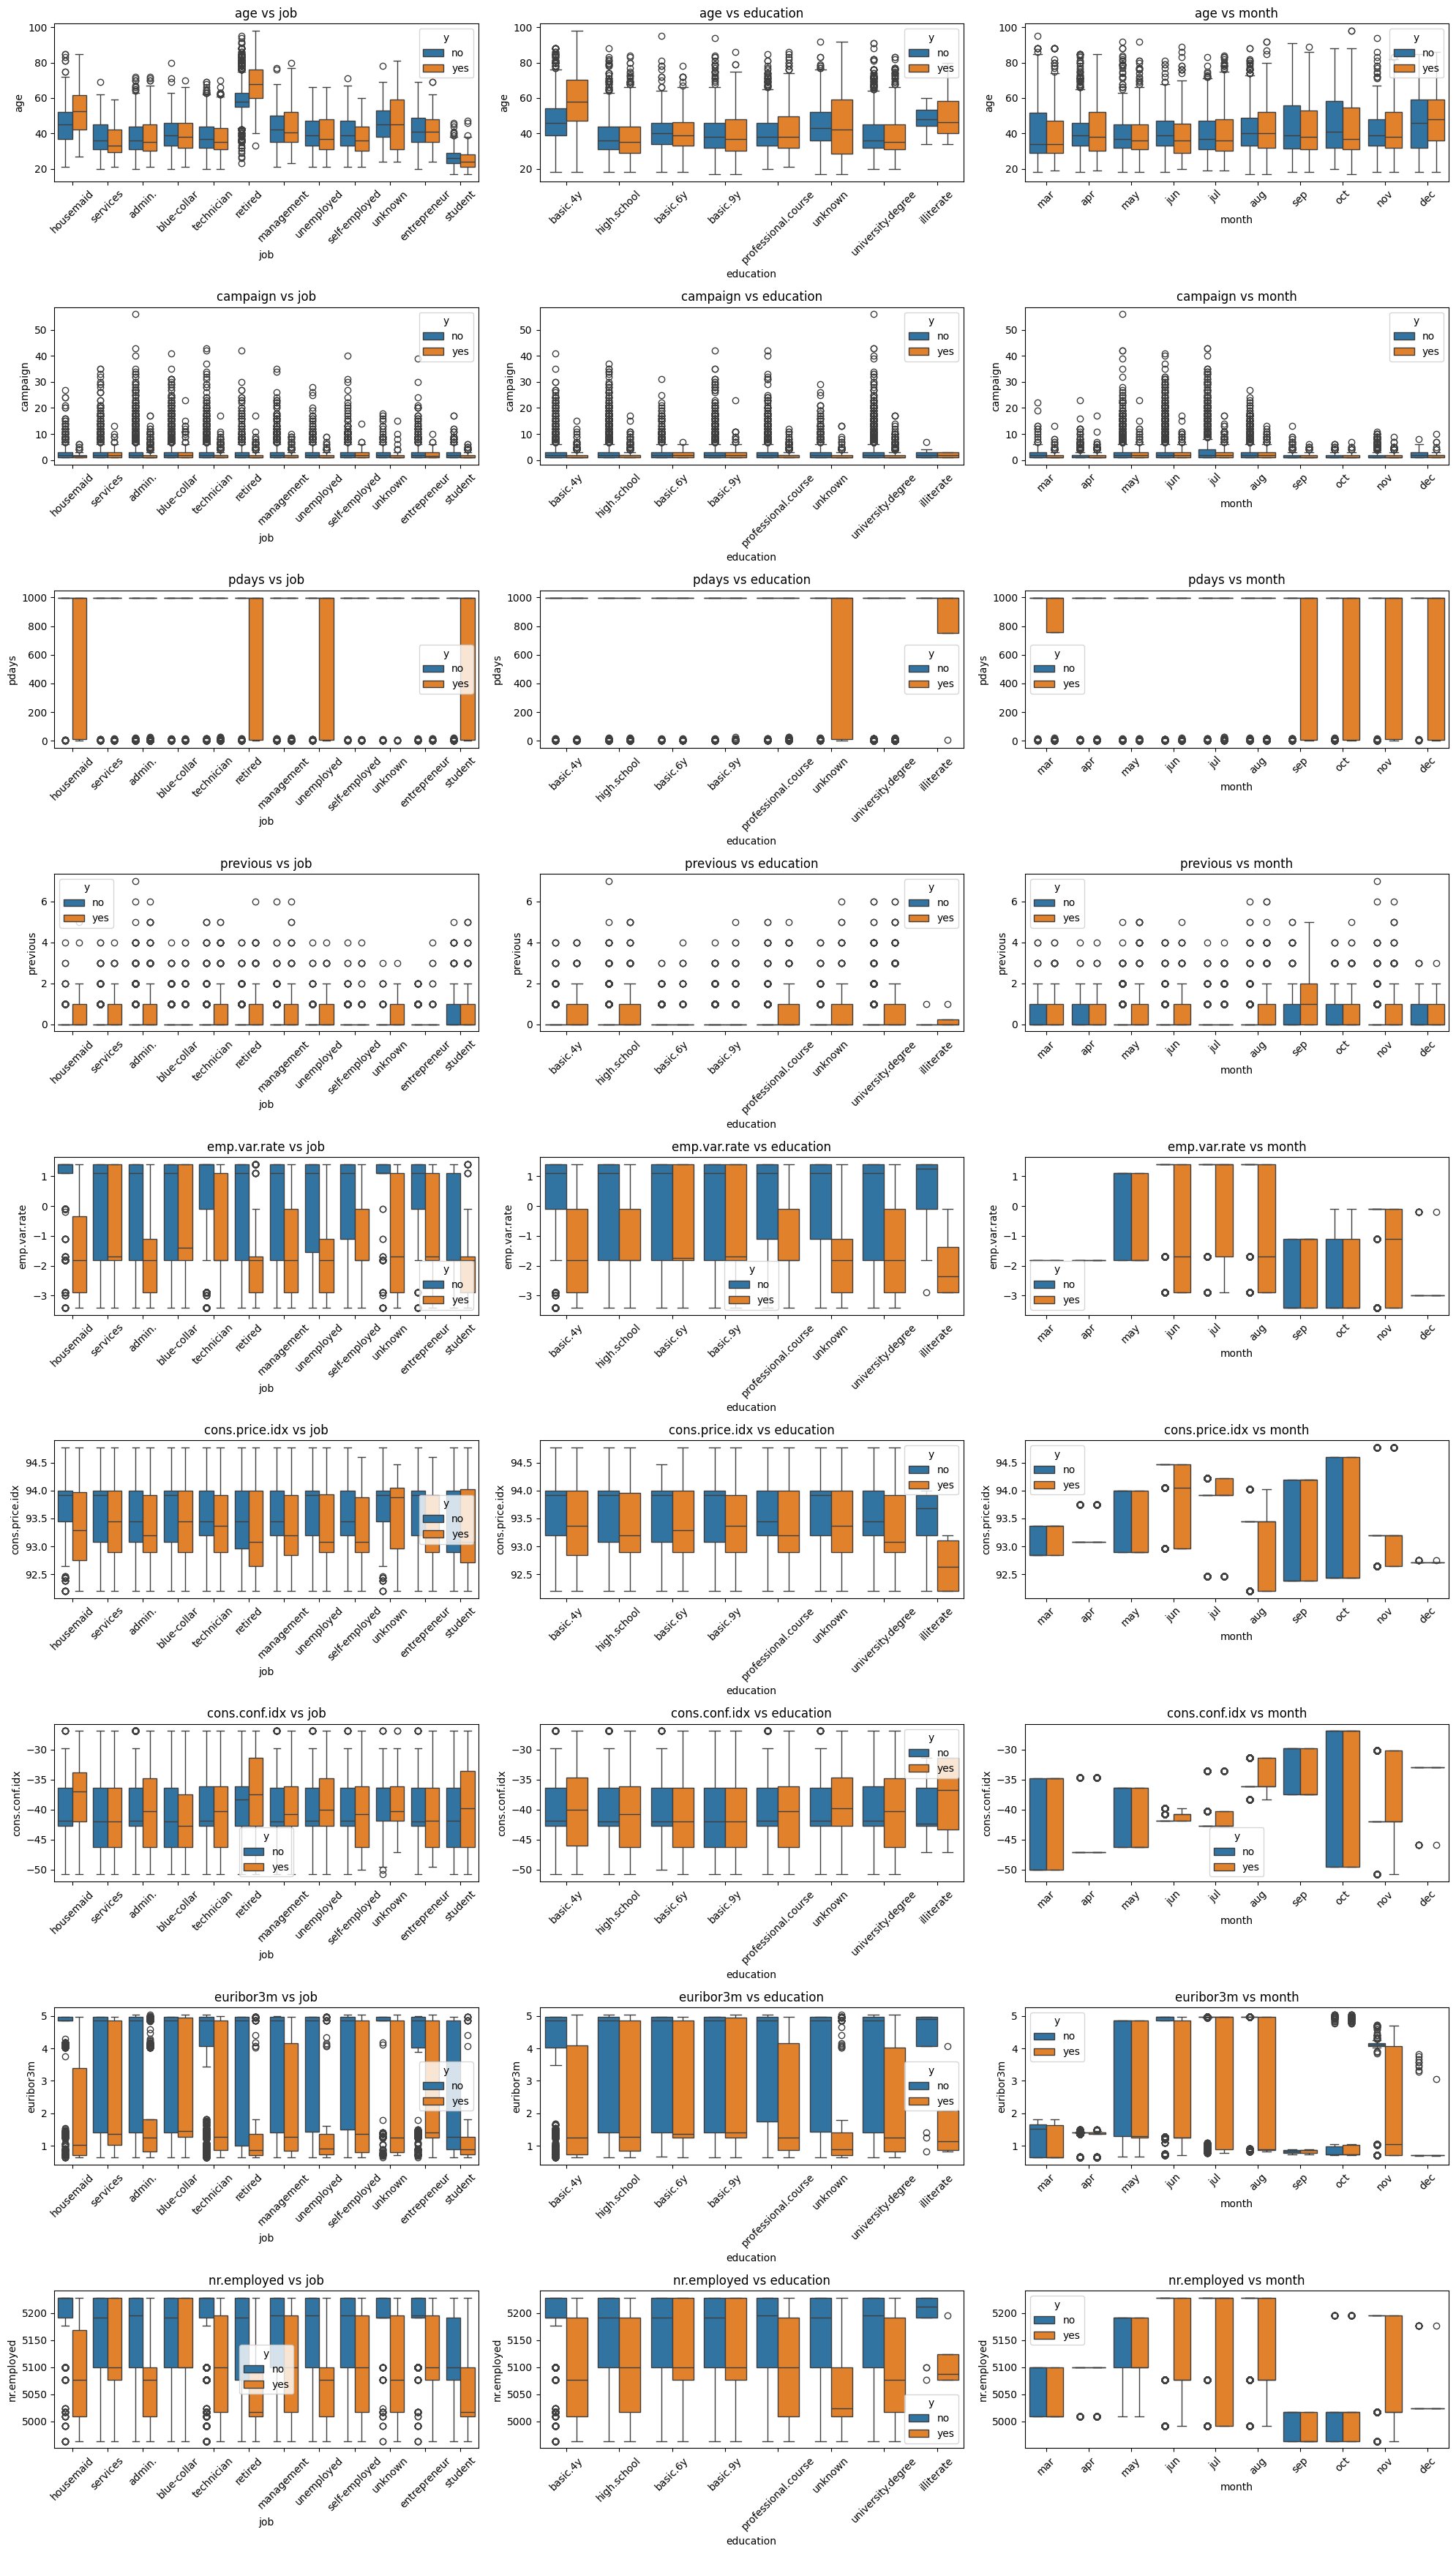


Target variable distribution:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


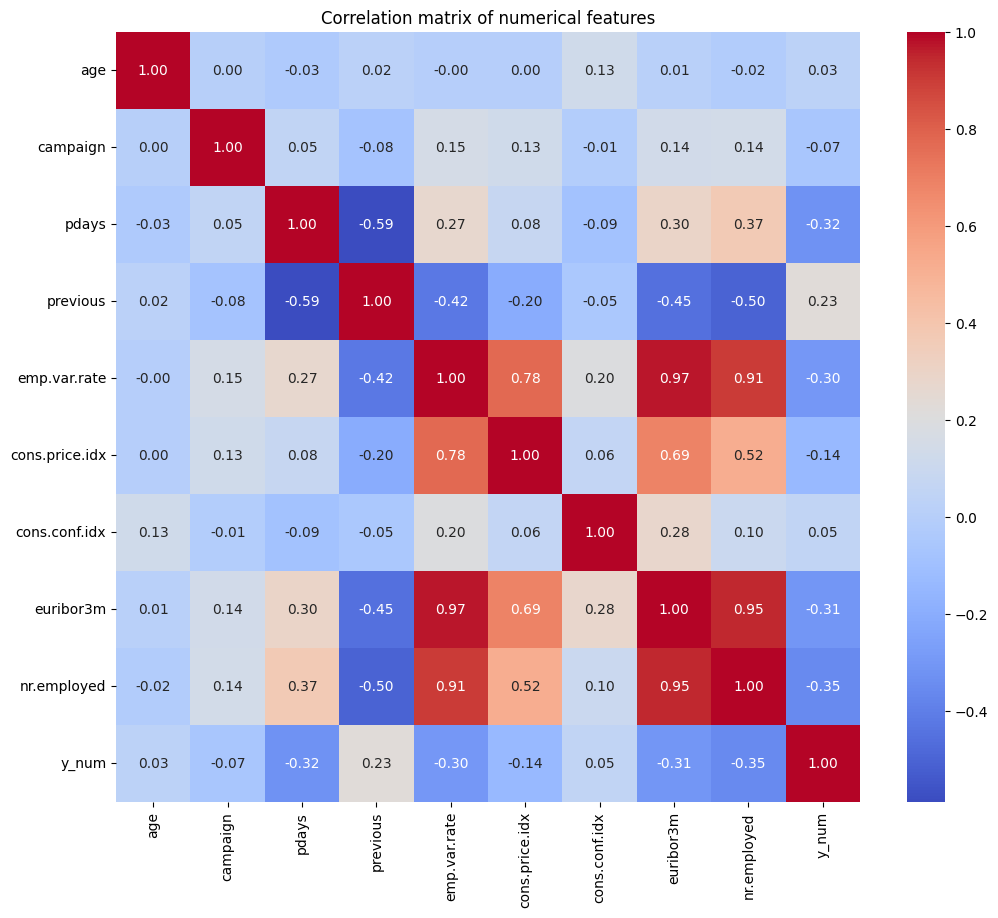


Cross-tabulation of job and target 'y':
y                 no    yes
job                        
admin.         0.870  0.130
blue-collar    0.931  0.069
entrepreneur   0.915  0.085
housemaid      0.900  0.100
management     0.888  0.112
retired        0.748  0.252
self-employed  0.895  0.105
services       0.919  0.081
student        0.686  0.314
technician     0.892  0.108
unemployed     0.858  0.142
unknown        0.888  0.112

Cross-tabulation of marital and target 'y':
y            no    yes
marital               
divorced  0.897  0.103
married   0.898  0.102
single    0.860  0.140
unknown   0.850  0.150

Cross-tabulation of education and target 'y':
y                       no    yes
education                        
basic.4y             0.898  0.102
basic.6y             0.918  0.082
basic.9y             0.922  0.078
high.school          0.892  0.108
illiterate           0.778  0.222
professional.course  0.887  0.113
university.degree    0.863  0.137
unknown              0.855  0.1

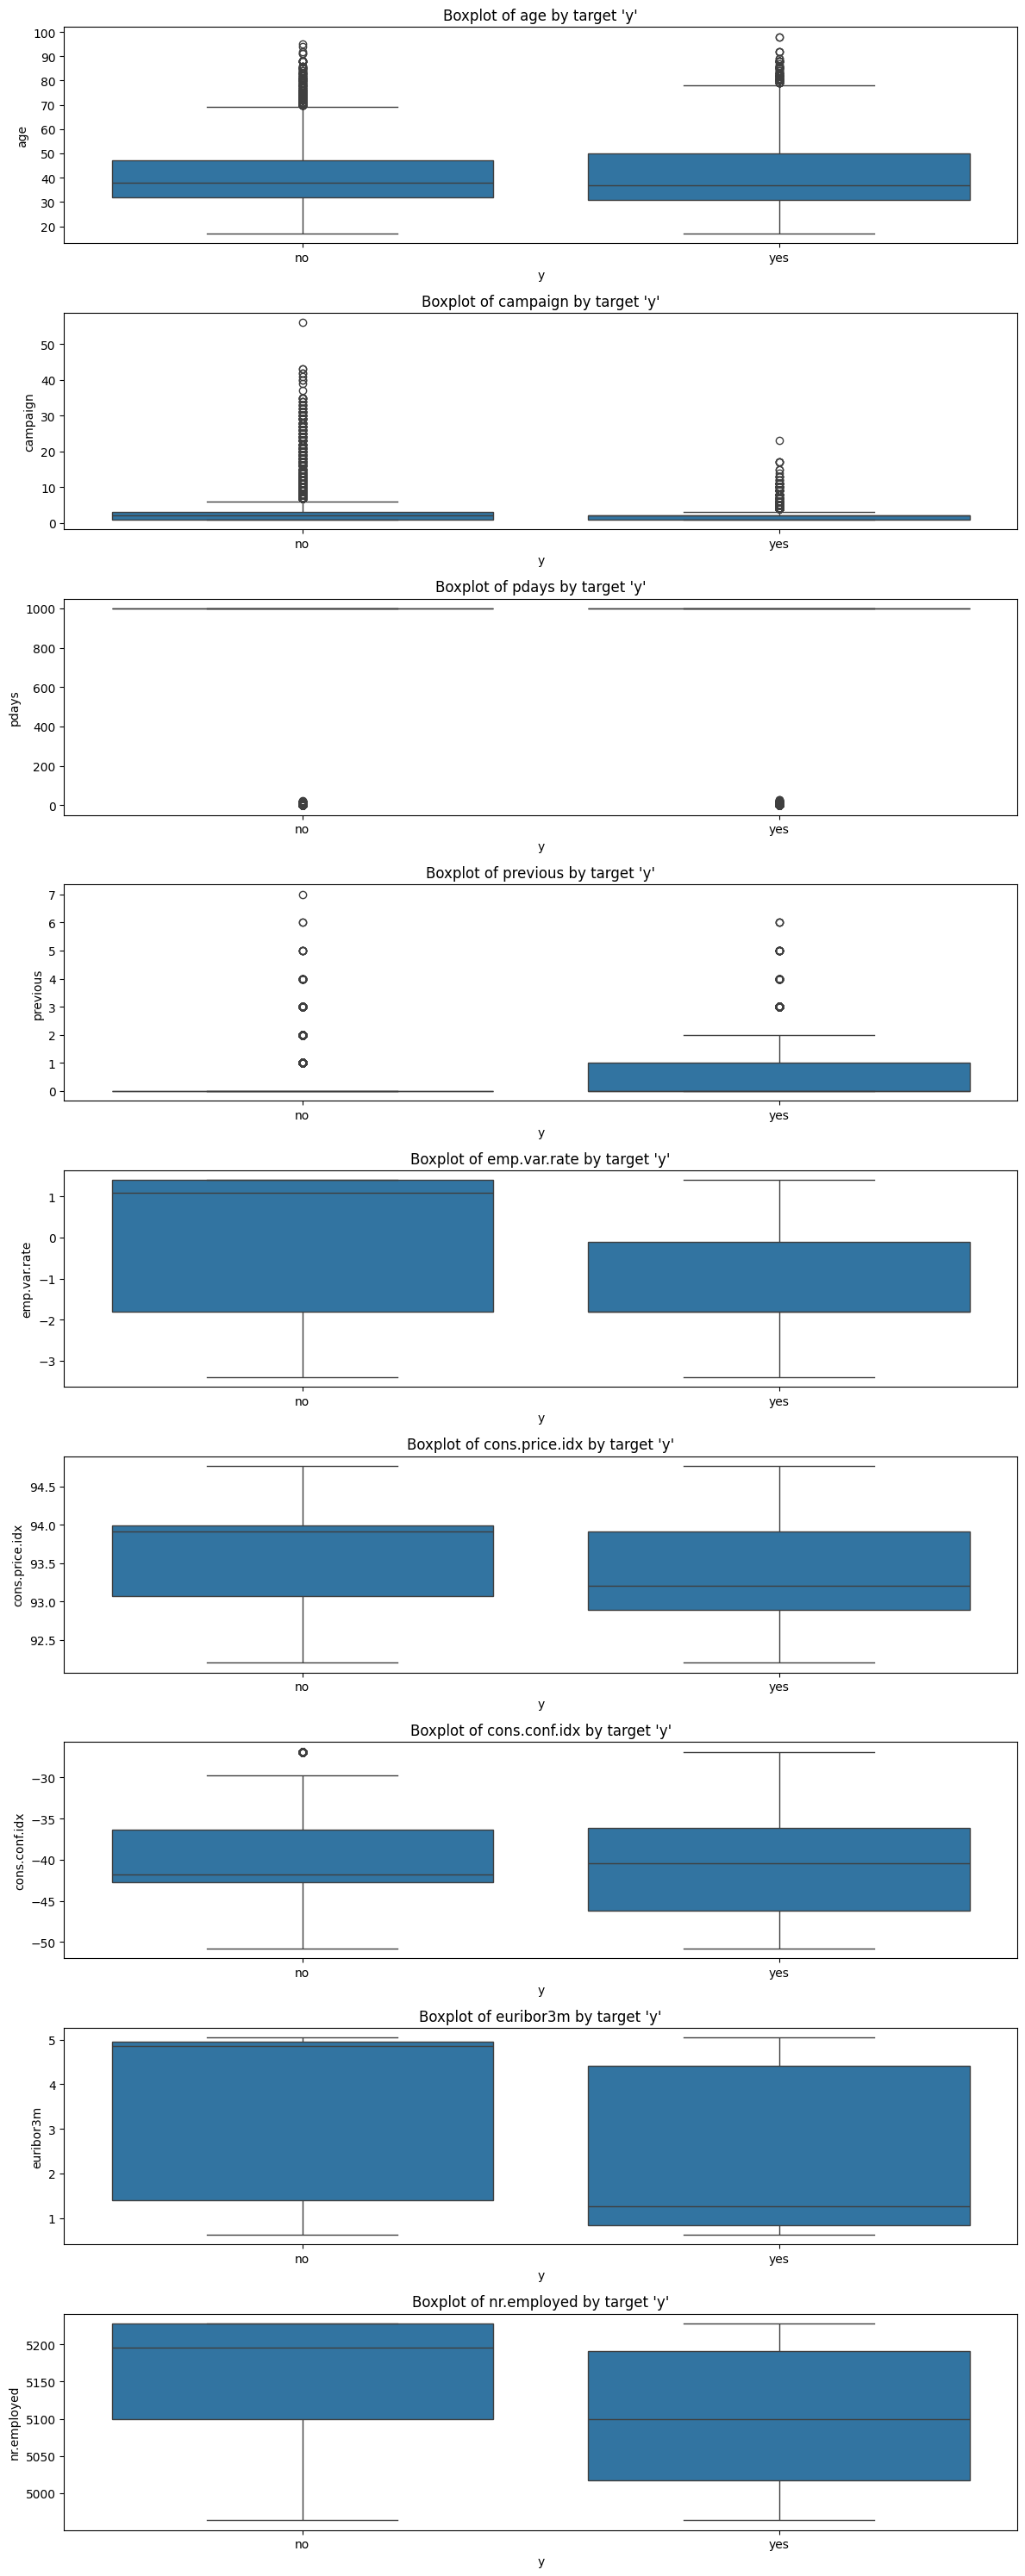


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.89      0.90      0.88      8238


Confusion Matrix:


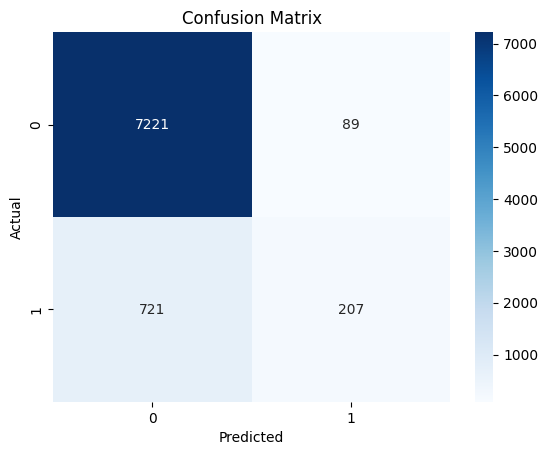

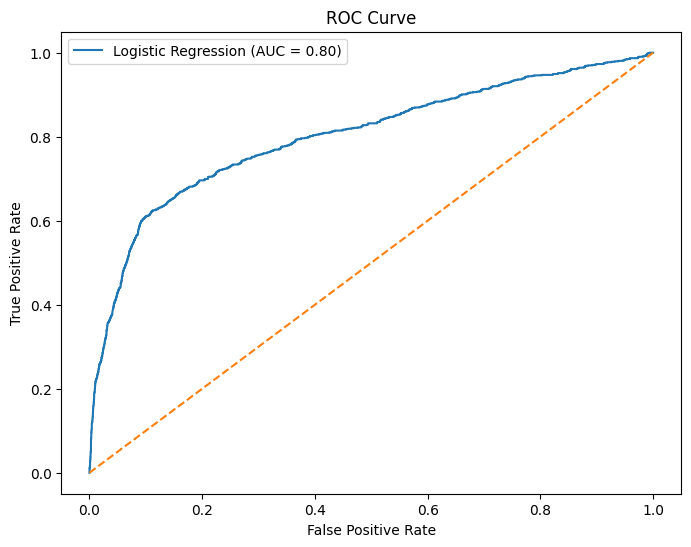


Best parameters from GridSearchCV: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation AUC: 0.790

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.72      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.81      0.60      0.64      8238
weighted avg       0.89      0.90      0.88      8238


Confusion Matrix (Best Model):


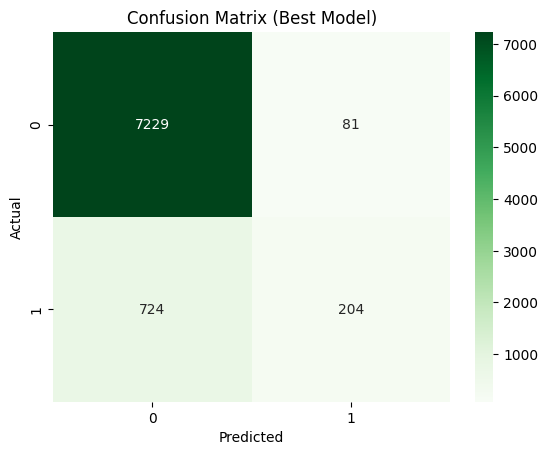

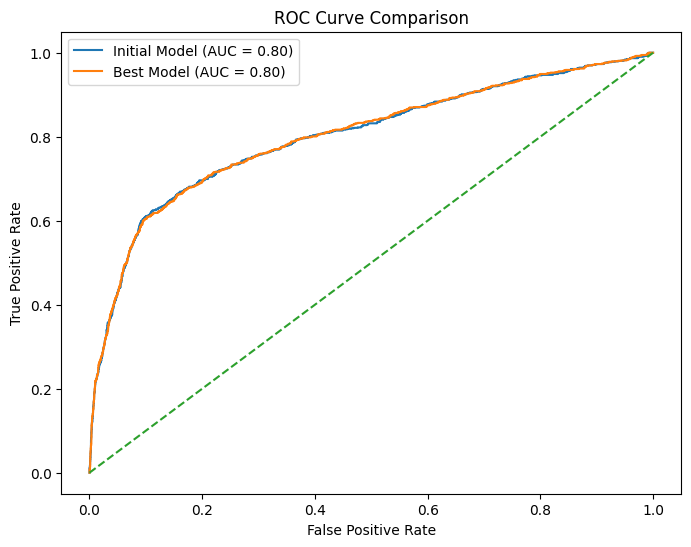

In [5]:
# Your code here

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Add data to variable 'total data'
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

# Insert raw data inside raw folder inside root.
total_data.to_csv('/workspaces/ginotomasd-ml-project-logisticalregression/data/raw/total_data.csv')

# Check for columns and rows
total_data.shape

# Check values inside
total_data.info()

# We can see that only 1 column contains all the rows, and we fixed that by adding delimiters to our 'total_data' variable.
    # Now each variable is stored in an individual column, and we are able to check for nulls
        # We do not find any nulls, all columns contain the same number of rows.
            # We discard the possibility of duplicates

duplicates = total_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

total_data[duplicates]

# After checking duplicates, we discover they are not duplicates, as they contain different IDs but arent shown because, of the way the data is structured, there is no ID column.

# Next step we drop all the data that isn't useful: 'default', 'loan', 'housing', 'duration'

filtered_data = total_data.drop(['default', 'loan', 'housing', 'duration' ], axis=1, inplace=True)

# Analysis of categorical - numerical data

# Categorical data: 'job', 'marital', 'education', 'contact','month', 'day_of_week', 'poutcome', 'y'

fig, axis = plt.subplots(2, 4, figsize=(15,7))

custom_month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
total_data['month'] = pd.Categorical(total_data['month'], categories=custom_month_order, ordered=True)

sns.histplot(ax = axis[0,0], data = total_data, x = "job")
sns.histplot(ax = axis[0,1], data = total_data, x = "marital")
sns.histplot(ax = axis[0,2], data = total_data, x = "education")
sns.histplot(ax = axis[0,3], data = total_data, x = "contact")
sns.histplot(ax = axis[1,0], data = total_data, x = "month")
sns.histplot(ax = axis[1,1], data = total_data, x = "day_of_week")
sns.histplot(ax = axis[1,2], data = total_data, x = "poutcome")
sns.histplot(ax = axis[1,3], data = total_data, x = "y")

for ax in axis.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# As we visualize the data, we can make some observations:
    # 'job': The most popular jobs are 'Blue Collar', 'Administrative' and 'Technicians'
    # 'marital': As of marital status, there are more single than divorced potential clients, and married clients are the majority.
    # 'education': The majority of potential clients have a university degree, and the second most popular category is high school education, comprising almost 50% of the data.
    # 'contact': There was almost 66% more contact by cellular phone than telephone 
    # 'month': We can see that May has the most registered calls, which the next month declined and remained halved until August, when they completely dropped. In November, before Christmas peaked again, but dropped soon after the next month.
    # 'day of week': Mondays and Thursdays have the most amount of calls, while Friday had the least amount, although not by much.
    # 'poutcome': We can see that most people weren't reached by any previous campaigns, but for those who did, the overwhelming majority was a failure. 
    # 'y': An overwhelming majority said no to the campaign, while a small minority said otherwhise.


# Our next step will be to visualize the numerical data

# Numerical data 'age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'

fig, axis = plt.subplots(3, 4, figsize=(15,7))

sns.histplot(ax = axis[0,0], data = total_data, x = "age")
sns.histplot(ax = axis[0,1], data = total_data, x = "campaign")
sns.histplot(ax = axis[0,2], data = total_data, x = "pdays")
sns.histplot(ax = axis[0,3], data = total_data, x = "previous")
sns.histplot(ax = axis[1,0], data = total_data, x = "emp.var.rate")
sns.histplot(ax = axis[1,1], data = total_data, x = "cons.price.idx")
sns.histplot(ax = axis[1,2], data = total_data, x = "cons.conf.idx")
sns.histplot(ax = axis[1,3], data = total_data, x = "euribor3m")
sns.histplot(ax = axis[2,0], data = total_data, x = "nr.employed")

axis[2,1].axis('off')
axis[2,2].axis('off')
axis[2,3].axis('off')

plt.tight_layout()
plt.show()

# We can make several observations from the visualized data.
    # 'age': The majority of the potential clients are comprised within the ages of 20-60yo.
    # 'campaign': We observe that the majority of the potential clients are comprised within the 0-5 range, never contacting more than that.
    # 'pdays': Representing days since last contact, the overwhelming majority where never contacted the following days, only a few where contacted.
    # 'previous': The majority were never contacted before this campaign, while the most contacts made was 2.
    # 'emp.var.rate': The employment variation rate is high for positive values, which means the campaigns were performed during an economic growth period, wheree employment rose.
    # 'cons.price.idx': Most values are concentrated around 92–94, indicating a narrow spread in the consumer price index during the campaign periods. This stability may suggest low inflation volatility during most campaigns.
    # 'cons.conf.idx': Consumer confidence index mostly ranges from -50 to -30, indicating that despite variations, public confidence was generally low, possibly affecting campaign outcomes.
    # 'euribor3m': Most values lie above 1.0, peaking near 4.9, suggesting the campaigns mostly occurred during times of relatively high interest rates, which could affect customers’ willingness to invest in term deposits.
    # 'nr.employed': The distribution shows most values are clustered around 5000–5200, implying employment levels were relatively high and stable during the majority of the campaigns.

# Analysis of multivariate variables

# Numerical - Numerical Analysis (Correlation):

# Make sure 'y' is numeric
total_data['y_num'] = total_data['y'].map({'no': 0, 'yes': 1})

# Create a 9x2 subplot
fig, axis = plt.subplots(9, 2, figsize=(14, 50))

# Plot regplot and heatmap pairs
sns.regplot(ax=axis[0, 0], data=total_data, x='y_num', y='age')
sns.heatmap(total_data[['y_num', 'age']].corr(), annot=True, ax=axis[0, 1])

sns.regplot(ax=axis[1, 0], data=total_data, x='y_num', y='campaign')
sns.heatmap(total_data[['y_num', 'campaign']].corr(), annot=True, ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x='y_num', y='pdays')
sns.heatmap(total_data[['y_num', 'pdays']].corr(), annot=True, ax=axis[2, 1])

sns.regplot(ax=axis[3, 0], data=total_data, x='y_num', y='previous')
sns.heatmap(total_data[['y_num', 'previous']].corr(), annot=True, ax=axis[3, 1])

sns.regplot(ax=axis[4, 0], data=total_data, x='y_num', y='emp.var.rate')
sns.heatmap(total_data[['y_num', 'emp.var.rate']].corr(), annot=True, ax=axis[4, 1])

sns.regplot(ax=axis[5, 0], data=total_data, x='y_num', y='cons.price.idx')
sns.heatmap(total_data[['y_num', 'cons.price.idx']].corr(), annot=True, ax=axis[5, 1])

sns.regplot(ax=axis[6, 0], data=total_data, x='y_num', y='cons.conf.idx')
sns.heatmap(total_data[['y_num', 'cons.conf.idx']].corr(), annot=True, ax=axis[6, 1])

sns.regplot(ax=axis[7, 0], data=total_data, x='y_num', y='euribor3m')
sns.heatmap(total_data[['y_num', 'euribor3m']].corr(), annot=True, ax=axis[7, 1])

sns.regplot(ax=axis[8, 0], data=total_data, x='y_num', y='nr.employed')
sns.heatmap(total_data[['y_num', 'nr.employed']].corr(), annot=True, ax=axis[8, 1])

plt.tight_layout()
plt.show()

# Observations:
    # There is no positive correlation between any of the variables, in fact, there are some negative correlations between variables.

# Categorical -  Categorical Analysis

# Categorical variables: 'job', 'marital', 'education', 'contact','month', 'day_of_week', 'poutcome', 'y'

categorical_vars = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()  # Flatten to access as a 1D array

for i, var in enumerate(categorical_vars):
    sns.countplot(data=total_data, x=var, hue='y', ax=axes[i])
    axes[i].set_title(f'Count of {var} grouped by y')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the unused 8th subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Observations:
    # Administrative, blue collar and technicians jobs were the ones who said 'no' and 'yes' the most.
    # Marital: Most 'married' said 'no'. 'Single' clients had a higher share of 'yes' responses.
    # Education: Higher education levels had slightly better 'yes' rates. 'Basic' education had mostly 'no' responses.
    # Contact: Contact by cellular led to more 'yes' responses than telephone.
    # Month: Most calls were in May, but better 'yes' rates occurred in March, September, and December.
    # Day of Week: Most calls on Monday and Thursday. Slightly better 'yes' rate on Friday.
    # Poutcome: Past success in campaigns strongly correlates with a 'yes'. Most had no prior contact or a failed attempt.

# Categorical-Numerical Analysis: Boxplots of numerical features grouped by categorical variables and target 'y'

# Define categorical and numerical variables
categorical_vars = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_vars = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot numerical variables against top 3 categorical variables (for brevity and clarity)
import itertools
fig, axes = plt.subplots(len(numerical_vars), 3, figsize=(20, 35))

for i, num_var in enumerate(numerical_vars):
    for j, cat_var in enumerate(['job', 'education', 'month']):
        sns.boxplot(ax=axes[i, j], data=total_data, x=cat_var, y=num_var, hue='y')
        axes[i, j].set_title(f"{num_var} vs {cat_var}")
        axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Observations:
    # Age: Older clients say 'yes' more often in jobs like 'retired' and education levels like 'tertiary'.
    # Campaign: Fewer contacts per campaign correlate with more 'yes', regardless of category.
    # Pdays: Higher values (recent contact) increase 'yes' rates across most groups.
    # Previous: Clients with more past contacts often say 'yes'.
    # Emp.var.rate & Euribor3m: Lower values associate with more 'yes' responses.
    # Cons.price.idx & Cons.conf.idx: Slight differences by education/month; higher confidence = more 'yes'.
    # Nr.employed: Lower values align with more 'yes', likely due to less aggressive market saturation.

# 1. Check target variable balance
print("\nTarget variable distribution:")
print(total_data['y'].value_counts(normalize=True))

# 2. Check correlations heatmap (all numeric features including 'y_num')
plt.figure(figsize=(12, 10))
corr_matrix = total_data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix of numerical features")
plt.show()

# 3. Explore interactions between key categorical variables and target with cross-tab
key_cat_vars = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

for var in key_cat_vars:
    print(f"\nCross-tabulation of {var} and target 'y':")
    print(pd.crosstab(total_data[var], total_data['y'], normalize='index').round(3))

# 4. Summary statistics grouped by target
print("\nSummary statistics for numerical variables by target class:")
print(total_data.groupby('y')[numerical_vars].describe().transpose())

# 5. Final check for outliers on numerical variables by target with boxplots

fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 30))
for i, num_var in enumerate(numerical_vars):
    sns.boxplot(x='y', y=num_var, data=total_data, ax=axes[i])
    axes[i].set_title(f"Boxplot of {num_var} by target 'y'")
plt.tight_layout()
plt.show()

# We can proceed to preprocessing, feature engineering, and model building next.

# Separate target and features
X = total_data.drop(columns=['y', 'y_num'])
y = total_data['y_num']

# Split into train and test sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define categorical and numerical columns
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')  # drop first to avoid dummy trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Build a pipeline with preprocessing and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hyperparameter tuning with GridSearchCV (optional, can be time consuming)
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"\nBest parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.3f}")

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix (Best Model):")
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Initial Model (AUC = {roc_auc:.2f})')
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
plt.plot(fpr_best, tpr_best, label=f'Best Model (AUC = {roc_auc_best:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


